# import pyspark

In [1]:
import re

In [73]:
sc.stop()

In [74]:
from pyspark import SparkContext
sc = SparkContext("local", "Simple App")

In [75]:
sc

<SparkContext master=local appName=Simple App>

In [5]:
raw_data = sc.textFile("d:/valbuz/Francais Methodes/Russe/kitchen01-20.txt",
                       use_unicode = True)

In [6]:
parse_data = raw_data.flatMap(lambda x:re.split("\W+",x)).filter(lambda x:x != "").map(lambda x: x.lower())

In [7]:
parse_data.take(3)

['серия', '1', 'чего']

In [8]:
livre1 = parse_data.collect()

In [9]:
from collections import Counter

In [10]:
dict_serial1 = (Counter(livre1))

In [11]:
dict_serial1['ты']

786

In [12]:
raw_data.take(2)

['СЕРИЯ 1', 'Чего бы вам хотелось?']

In [17]:
dict_serial1.most_common(10)

[('я', 1160),
 ('не', 1059),
 ('что', 869),
 ('ты', 786),
 ('а', 751),
 ('в', 566),
 ('это', 516),
 ('и', 506),
 ('да', 482),
 ('ну', 457)]

In [18]:
print(list(dict_serial1.elements()))

['гастарбайтер', 'неуместен', 'крест', 'замолчи', 'замолчи', 'свой', 'свой', 'свой', 'свой', 'свой', 'свой', 'свой', 'свой', 'свой', 'свой', 'свой', 'свой', 'свой', 'свой', 'свой', 'свой', 'свой', 'свой', 'свой', 'свой', 'свой', 'свой', 'свой', 'свой', 'здравствуй', 'здравствуй', 'здравствуй', 'здравствуй', 'удивился', '100000', '100000', 'грузчик', 'начало', 'согласен', 'согласен', 'согласен', 'согласен', 'согласен', 'согласен', 'согласен', 'согласен', 'согласен', 'согласен', 'жульё', 'лишнее', 'объясните', 'шуточки', 'кокнули', 'избил', 'ежедневно', 'нравоучений', 'проверяю', 'простовата', 'абракадабру', 'колпаке', 'счетам', 'появится', 'офигенное', 'достойного', 'водки', 'ко', 'ко', 'ко', 'ко', 'ко', 'ко', 'ко', 'ко', 'ко', 'ко', 'ко', 'ко', 'ко', 'ко', 'ко', 'ко', 'ко', 'ко', 'ко', 'ко', 'ко', 'ко', 'ко', 'ко', 'ко', 'ко', 'ко', 'ко', 'поразительно', 'рассказывай', 'доказать', 'доказать', 'доказать', 'иностранцы', 'волшебно', 'пушистым', 'соответствующей', 'завитушками', 'баке', 'т

In [19]:
print(dict_serial1.items())

dict_items([('гастарбайтер', 1), ('неуместен', 1), ('крест', 1), ('замолчи', 2), ('свой', 24), ('здравствуй', 4), ('удивился', 1), ('100000', 2), ('грузчик', 1), ('начало', 1), ('согласен', 10), ('жульё', 1), ('лишнее', 1), ('объясните', 1), ('шуточки', 1), ('кокнули', 1), ('избил', 1), ('ежедневно', 1), ('нравоучений', 1), ('проверяю', 1), ('простовата', 1), ('абракадабру', 1), ('колпаке', 1), ('счетам', 1), ('появится', 1), ('офигенное', 1), ('достойного', 1), ('водки', 1), ('ко', 28), ('поразительно', 1), ('рассказывай', 1), ('доказать', 3), ('иностранцы', 1), ('волшебно', 1), ('пушистым', 1), ('соответствующей', 1), ('завитушками', 1), ('баке', 1), ('таким', 2), ('папа', 12), ('делай', 5), ('друзей', 3), ('ними', 1), ('оазис', 1), ('мяч', 1), ('способов', 1), ('меньше', 5), ('увольнения', 1), ('папой', 5), ('выживу', 1), ('лодки', 2), ('экспертиза', 1), ('живите', 1), ('перерезали', 1), ('обалдел', 1), ('игра', 1), ('ящика', 1), ('держусь', 1), ('полторашку', 1), ('проболтался', 1)

In [20]:
len(dict_serial1)

7729

In [144]:
f = codecs.open('d:/outcome.txt', encoding='utf-8', mode='w+')

for t in dict_serial1.keys():
    f.write(u"%s, %i\r\n" % (t,dict_serial1[t]))
    
f.close()

In [154]:
f = codecs.open('d:/outcome2.txt', encoding='utf-8', mode='w+')


[f.write(u"%s,%i\r\n" % (t[0],t[1])) for t in dict_serial1.most_common()]
    
f.close()

In [21]:
type(livre1[0])

str

In [57]:
livre1[2].encode('b')

LookupError: unknown encoding: b

In [58]:
str.encode

<method 'encode' of 'str' objects>

In [60]:

help(str.encode)

Help on method_descriptor:

encode(...)
    S.encode(encoding='utf-8', errors='strict') -> bytes
    
    Encode S using the codec registered for encoding. Default encoding
    is 'utf-8'. errors may be given to set a different error
    handling scheme. Default is 'strict' meaning that encoding errors raise
    a UnicodeEncodeError. Other possible values are 'ignore', 'replace' and
    'xmlcharrefreplace' as well as any other name registered with
    codecs.register_error that can handle UnicodeEncodeErrors.



In [22]:
import codecs

In [75]:
f = codecs.open('d:/valbuz/Francais Methodes/Russe/kitchen01-20.txt', encoding='utf-8')

In [76]:
f

In [77]:
for line in f:
    print(repr(line))

'\ufeffСЕРИЯ 1\r\n'
'Чего бы вам хотелось?\r\n'
'Сочный кусок телятины, обжаренный с чесноком, розмарином и перцем? А может, нежнейшей\r\n'
'сёмги в соусе из сливок, ароматных грибов и фантастического белого вина? Или припущенных на\r\n'
'гриле помидоров с кусочками цукини, запечённых до карамельной корочки? Еда – это страсть, еда –\r\n'
'это любовь, еда – это жизнь для каждого человека. Я повар, я знаю, о чём я говорю.\r\n'
'Правда, это не я. Вот я. Но ничего, через пару лет я тоже стану известным поваром. Потому что\r\n'
'знаменитостям достаются самые красивые девушки. Но пока я не знаменит, у меня свой способ. Он\r\n'
'немного болезненный, но зато 100-процентный.\r\n'
'- Слышь, мужик, ты как себя с девушкой ведёшь?\r\n'
'- Больно?\r\n'
'- Да неее. Мне просто на собеседование завтра. А мне кажется, у меня нос сломан. Это ж мой\r\n'
'инструмент.\r\n'
'- А ты кем устраиваешься?\r\n'
'- А, поваром в ресторан.\r\n'
'- Повар? А я тоже в ресторане работаю.\r\n'
'- Да ну?\r\n'
'- Да. У нас 

In [23]:
from nltk.stem import SnowballStemmer

In [24]:
print(" ".join(SnowballStemmer.languages))

danish dutch english finnish french german hungarian italian norwegian porter portuguese romanian russian spanish swedish


In [25]:
stemmer = SnowballStemmer("russian")

In [26]:
for word in dict_serial1.keys():
    print(stemmer.stem(word))

гастарбайтер
неумест
крест
замолч
сво
здравств
удив
100000
грузчик
нача
соглас
жул
лишн
объясн
шуточк
кокнул
изб
ежедневн
нравоучен
проверя
простоват
абракадабр
колпак
счет
появ
офиген
достойн
водк
ко
поразительн
рассказыва
доказа
иностранц
волшебн
пушист
соответств
завитушк
бак
так
пап
дела
друз
ним
оазис
мяч
способ
меньш
увольнен
пап
выжив
лодк
экспертиз
жив
перереза
обалдел
игр
ящик
держ
полторашк
проболта
салфетк
офигел
встава
провер
об
босфор
вселен
вызов
жил
идеальн
подвед
принес
рецепт
колпак
спиш
зарплат
нетерпен
косяк
зелен
вниман
нюанс
семейн
двест
подушк
лук
окрыля
волн
поможет
возможн
свет
почеса
треб
обидел
управля
вынос
новеньк
детал
котик
нагл
над
очк
стар
самовоспитыва
будет
реальност
прикр
сашеньк
прекрасн
принят
ор
недор
испуга
преда
нелегал
люб
птичк
рак
обжарк
куропатк
шкафчик
штук
облизыва
прояв
сотрудник
выросл
посторон
мног
нов
дурацк
шедевр
ненадолг
куп
таблетк
шут
пообеда
переч
использ
тан
необузда
креветк
дума
соус
проверк
эконом
тет
узна
п
вкусн
пят
дож
увер


In [27]:
parse_data_stem = raw_data.flatMap(lambda x:re.split("\W+",x)).filter(lambda x:x != "").map(lambda x: x.lower()).map(lambda x: stemmer.stem(x))

In [28]:
livre1_stem = parse_data_stem.collect()

In [29]:
dict_serial1_stem = (Counter(livre1_stem))

In [30]:
f = codecs.open('d:/outcome2_stem.txt', encoding='utf-8', mode='w+')


[f.write(u"%s,%i\r\n" % (t[0],t[1])) for t in dict_serial1_stem.most_common()]
    
f.close()

In [31]:
len(list(dict_serial1_stem.elements()))

38961

In [32]:
for word in dict_serial1_stem.keys():
    print(word, len(word))

выдава 6
гастарбайтер 12
разыгрыва 9
евген 5
туфл 4
100000 6
11 2
наставник 9
выбира 6
переночева 10
жева 4
подума 6
дрыхнут 7
скидк 5
будт 4
усмотрен 8
тишин 5
лучш 4
ссыш 4
един 4
дубликат 8
сожра 5
поговарива 10
е 1
дырок 5
фигач 5
подъезд 7
зли 3
ко 2
сам 3
кают 4
добива 6
молодц 6
летет 5
улетел 6
совпаден 8
господ 6
занесл 6
разойдут 8
намаж 5
традицион 9
спасиб 6
сел 3
поздравля 9
станеш 6
проверк 7
коллект 7
тоб 3
пробужден 9
пицц 4
чудесн 6
мяч 3
падл 4
уч 2
куч 3
принципиальн 12
разберет 8
объявлен 8
живет 5
ананас 6
ручк 4
брехл 5
конфликт 8
рожден 6
обалдел 7
игра 4
указыва 7
забыт 5
буратин 7
вправ 5
пострада 8
взглянут 8
флот 4
променя 7
сверхскоростн 13
голода 6
обо 3
подра 5
влюб 4
босфор 6
планир 6
будущ 5
снят 4
триумфатор 10
интеллект 9
внимательн 10
брал 4
пож 3
умерет 6
наказа 6
колпак 6
работник 8
пятниц 6
подкра 6
выберет 7
спрячеш 7
профессиона 11
косяк 5
брюнет 6
нюанс 5
нахр 4
раб 3
14 2
пообеща 7
скромнича 9
улыбк 5
неч 3
обнима 6
несправедлив 12
морковк 7
от

In [33]:
parse_data_stem4 = raw_data.flatMap(lambda x:re.split("\W+",x)).filter(lambda x:x != "").map(lambda x: x.lower()).map(lambda x: stemmer.stem(x)).filter(lambda x:len(x)>2)

In [34]:
livre1_stem4 = parse_data_stem4.collect()

In [35]:
dict_serial1_stem4 = (Counter(livre1_stem4))

In [36]:
f = codecs.open('d:/outcome2_stem4.txt', encoding='utf-8', mode='w+')


[f.write(u"%s,%i\r\n" % (t[0],t[1])) for t in dict_serial1_stem4.most_common()]
    
f.close()

In [37]:
len(dict_serial1_stem4)

4549

In [38]:
len(dict_serial1_stem)

4732

In [178]:
dict_serial1_stem4.most_common()

[('что', 869),
 ('так', 453),
 ('теб', 435),
 ('как', 417),
 ('шеф', 336),
 ('мен', 312),
 ('все', 311),
 ('мне', 278),
 ('вот', 235),
 ('нет', 192),
 ('дава', 183),
 ('прост', 157),
 ('вас', 151),
 ('над', 146),
 ('нас', 139),
 ('сказа', 136),
 ('вам', 130),
 ('есл', 130),
 ('был', 126),
 ('виктор', 122),
 ('может', 117),
 ('хорош', 113),
 ('сейчас', 112),
 ('сам', 109),
 ('спасиб', 109),
 ('рестора', 108),
 ('говор', 108),
 ('зде', 108),
 ('макс', 106),
 ('нич', 104),
 ('тольк', 102),
 ('кто', 101),
 ('вик', 99),
 ('наш', 98),
 ('сегодн', 98),
 ('сво', 97),
 ('вообщ', 96),
 ('там', 96),
 ('тво', 96),
 ('очен', 92),
 ('где', 92),
 ('ест', 92),
 ('кост', 91),
 ('готов', 89),
 ('будет', 87),
 ('дела', 86),
 ('для', 85),
 ('чтоб', 83),
 ('лев', 81),
 ('повар', 81),
 ('тут', 81),
 ('нам', 81),
 ('пожалуйст', 79),
 ('ладн', 79),
 ('чег', 78),
 ('работа', 78),
 ('ваш', 76),
 ('кухн', 74),
 ('ден', 74),
 ('понима', 72),
 ('конечн', 71),
 ('работ', 71),
 ('поч', 71),
 ('друг', 70),
 ('мог', 6

In [39]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

2.2.1


In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.tools as tls

<Container object of 4549 artists>

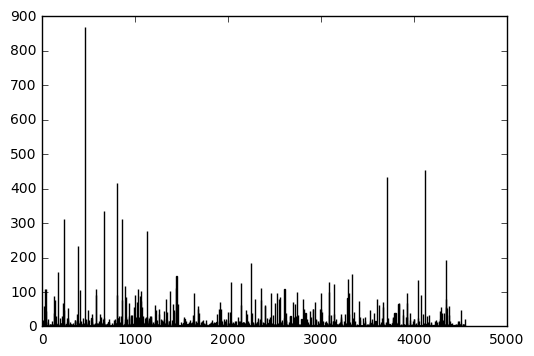

In [63]:
plt.bar(range(len(dict_serial1_stem4)),dict_serial1_stem4.values(),color = "blue")

In [112]:
import plotly
import plotly.graph_objs as go

data = [go.Bar(
            x=sorted(dict_serial1_stem4, key=dict_serial1_stem4.get, reverse = True )[0:50],
            y=sorted(dict_serial1_stem4.values(), reverse=True)[0:50]
    )]

type(data)
data
plotly.offline.plot(data)

'file://C:\\Users\\valer_3w0bq3q\\Documents\\temp-plot.html'

In [81]:
data = [go.Bar(
            x=['giraffes', 'orangutans', 'monkeys'],
            y=[20, 14, 23]
    )]
data

[{'type': 'bar',
  'x': ['giraffes', 'orangutans', 'monkeys'],
  'y': [20, 14, 23]}]

In [86]:
dict_serial1_stem4.keys()
dict_serial1_stem4.values()
dict_serial1_stem4.most_common(10)

[('что', 869),
 ('так', 453),
 ('теб', 435),
 ('как', 417),
 ('шеф', 336),
 ('мен', 312),
 ('все', 311),
 ('мне', 278),
 ('вот', 235),
 ('нет', 192)]

In [106]:
sorted(dict_serial1_stem4, key=dict_serial1_stem4.get, reverse = True )

['что',
 'так',
 'теб',
 'как',
 'шеф',
 'мен',
 'все',
 'мне',
 'вот',
 'нет',
 'дава',
 'прост',
 'вас',
 'над',
 'нас',
 'сказа',
 'есл',
 'вам',
 'был',
 'виктор',
 'может',
 'хорош',
 'сейчас',
 'сам',
 'спасиб',
 'зде',
 'рестора',
 'говор',
 'макс',
 'нич',
 'тольк',
 'кто',
 'вик',
 'наш',
 'сегодн',
 'сво',
 'вообщ',
 'тво',
 'там',
 'очен',
 'где',
 'ест',
 'кост',
 'готов',
 'будет',
 'дела',
 'для',
 'чтоб',
 'нам',
 'тут',
 'лев',
 'повар',
 'ладн',
 'пожалуйст',
 'работа',
 'чег',
 'ваш',
 'кухн',
 'ден',
 'понима',
 'конечн',
 'поч',
 'работ',
 'друг',
 'мог',
 'наст',
 'когд',
 'слуша',
 'извин',
 'добр',
 'пот',
 'этот',
 'дел',
 'блюд',
 'дума',
 'буд',
 'котор',
 'лучш',
 'привет',
 'себ',
 'петрович',
 'вит',
 'поня',
 'сдела',
 'гост',
 'чем',
 'раз',
 'знач',
 'пок',
 'увол',
 'инвалид',
 'нибуд',
 'костя',
 'пойд',
 'нужн',
 'хотел',
 'больш',
 'человек',
 'скаж',
 'подожд',
 'сюд',
 'сергеевн',
 'хоч',
 'быт',
 'тож',
 'ресторан',
 'тоб',
 'сен',
 'нормальн',
 '

In [109]:
sorted(dict_serial1_stem4.values(), reverse=True)

[869,
 453,
 435,
 417,
 336,
 312,
 311,
 278,
 235,
 192,
 183,
 157,
 151,
 146,
 139,
 136,
 130,
 130,
 126,
 122,
 117,
 113,
 112,
 109,
 109,
 108,
 108,
 108,
 106,
 104,
 102,
 101,
 99,
 98,
 98,
 97,
 96,
 96,
 96,
 92,
 92,
 92,
 91,
 89,
 87,
 86,
 85,
 83,
 81,
 81,
 81,
 81,
 79,
 79,
 78,
 78,
 76,
 74,
 74,
 72,
 71,
 71,
 71,
 70,
 69,
 69,
 67,
 67,
 67,
 66,
 65,
 65,
 64,
 63,
 61,
 61,
 61,
 60,
 60,
 60,
 58,
 57,
 57,
 57,
 57,
 56,
 55,
 55,
 52,
 52,
 52,
 52,
 51,
 51,
 51,
 50,
 50,
 50,
 49,
 49,
 48,
 48,
 48,
 48,
 47,
 46,
 45,
 45,
 44,
 43,
 43,
 42,
 42,
 41,
 41,
 40,
 40,
 39,
 39,
 39,
 39,
 39,
 38,
 38,
 38,
 38,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 36,
 36,
 35,
 35,
 35,
 34,
 34,
 34,
 34,
 34,
 33,
 33,
 33,
 33,
 32,
 31,
 31,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 29,
 29,
 29,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 27,
 27,
 27,
 27,
 27,
 26,
 26,
 26,
 26,
 26,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 24,
 24,
 24,
 24,
 24,
 24,
 24

In [183]:
sc.uiWebUrl

'http://10.0.75.1:4042'

In [185]:
import sys
sys.stdout.encoding

'UTF-8'

In [186]:
sys.getdefaultencoding()

'utf-8'

In [187]:
type(dict_serial1)

collections.Counter

In [188]:
test = Counter()

In [189]:
type(test)

collections.Counter

In [190]:
test

Counter()

In [192]:
counts = Counter({"York":2})

In [193]:
counts

Counter({'York': 2})

In [194]:
test += counts

In [195]:
test

Counter({'York': 2})

In [196]:
counts = Counter ({"York":10})

In [197]:
test += counts

In [54]:
test

NameError: name 'test' is not defined

In [58]:
sc.parallelize([1, 2, 3, 4]).collect()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\valer_3w0bq3q\\AppData\\Local\\Temp\\spark-4f78c815-983f-42bb-a24d-c4a3068945a1\\pyspark-ae9531c4-96a3-492a-a285-2d138fd65041\\tmpo08_hdoh'

In [62]:
edges = sc.textFile("d:/valbuz/wordcloud/twitter_rv.net")

In [63]:
edges.collect()

['12   \t13',
 '12   \t14',
 '12   \t15',
 '16   \t17',
 '15   \t13',
 '11   \t14',
 '13   \t15',
 '16   \t19',
 '13   \t22',
 '13   \t18',
 '14   \t15',
 '14   \t17',
 '15   \t22',
 '9   \t11',
 '8   \t9',
 '7   \t9']

In [29]:
def parse_edge(s):
    user, follower = s.split("\t")
    return (int(user),int(follower))

In [30]:
forward_edges = edges.map(parse_edge).map(lambda e: (e[1],e[0])).cache()

In [31]:
x = 22
distances = sc.parallelize([(x,0)])

In [32]:
distances.collect()

[(22, 0)]

In [33]:
distances.join(forward_edges).collect()

[(22, (0, 13)), (22, (0, 15))]

In [34]:
def step(item):
    prev_v, prev_d, next_v = item[0], item[1][0], item[1][1]
    return (next_v,prev_d + 1)

In [35]:
distances.join(forward_edges).map(step).collect()

[(13, 1), (15, 1)]

In [ ]:
def parse_edge(s):
    user, follower = s.split("\t")
    return (int(user),int(follower))

def step(item):
    prev_v, prev_d, next_v = item[0], item[1][0], item[1][1]
    return (next_v,prev_d + 1)

def complete(item):
    v, old_d, new_d = item[0], item[1][0],item[1][1]
    return (v, old_d if old_d is not None else new_d)

edges = sc.textFile("d:/valbuz/wordcloud/twitter_rv.net")
forward_edges = edges.map(parse_edge).map(lambda e: (e[1],e[0])).cache()

x = 22
d = 0
dest = 9  

distances = sc.parallelize([(x,d)])

while True:
    candidates = distances.join(forward_edges).map(step)
    new_distances = distances.fullOuterJoin(candidates).map(complete)
    count = new_distances.filter(lambda i: i[1] == d + 1).count()
    if count > 0:
        d += 1
        distances = new_distances
        print("d= ", d, "count= ", count)
        print(new_distances.collect())
        found = new_distances.filter(lambda i: i[0] == dest).count()
        if found > 0:
            print("path to", dest, "found with distance: ", d)
    else:
        print("End of search")
        break
        

d=  1 count=  2
d=  2 count=  3
d=  3 count=  1
d=  4 count=  1
path to 9 found with distance:  4
d=  5 count=  2


In [41]:
distances.fullOuterJoin(candidates).map(complete).collect()

[(15, 1), (13, 1), (22, 0)]

In [76]:
def parse_edge(s):
    user, follower = s.split("\t")
    return (int(user),int(follower))

def step(item):
    prev_v, prev_d, next_v = item[0], item[1][0], item[1][1]
    return (next_v,prev_d + 1)

def complete(item):
    v, old_d, new_d = item[0], item[1][0],item[1][1]
    return (v, old_d if old_d is not None else new_d)

edges = sc.textFile("d:/valbuz/wordcloud/twitter_rv.net")
forward_edges = edges.map(parse_edge).map(lambda e: (e[1],e[0])).cache()

x = 22
d = 0
dest = 9  

distances = sc.parallelize([(x,d)])



In [70]:
d

0